In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Algorithm: universal portfolio
# Input: a sequence of market vectors X_{i,t}, i from m assets, t from n periods
# Output: Krichevsky-Trofimov mixture forecaster to build universal portfolio
def log_wealth_factor_rebalance(Q, X):
    # m, n = np.shape(X)
    # Nsim, m = np.shape(Q)
    lnW = np.log(np.matmul(Q, X))
    lnWcum = np.cumsum(lnW, axis = 1)
    return lnWcum

def universal_portfolio(X, Nsim = 1e5):
    m, n = np.shape(X)
    alpha = 0.5 * np.ones(m)
    Q = np.random.dirichlet(alpha, int(Nsim))

    lnWcum = log_wealth_factor_rebalance(Q, X)
    P_un_normalized = np.matmul(np.transpose(Q), np.exp(lnWcum-np.log(Nsim)))
    norm_Const = np.sum(np.exp(lnWcum-np.log(Nsim)), axis = 0, keepdims=True)
    return P_un_normalized/norm_Const


# Algorithm: exponentiated gradient portfolio
def expGrad_portfolio(X, eta = 0.1):
    m, n = np.shape(X)
    P =  np.ones((m, n+1))/m
    for t in range(n):
        w = np.sum(P[:, t]*X[:, t])
        P_un_normalized = P[:, t]*np.exp(eta*X[:, t]/w)
        P[:, t+1] = P_un_normalized/np.sum(P_un_normalized)
    return P


In [3]:
m, n = 20, 20
# X = np.exp(np.random.normal(0,0.25,size=(m, n)))
X = np.random.uniform(0.1,2,size=(m, n))


In [4]:
Q_UP = universal_portfolio(X, Nsim=1e6)
print(Q_UP)

[[0.05358333 0.05386971 0.05324782 0.0546439  0.05044583 0.0508351
  0.0555285  0.05412654 0.05572843 0.05969239 0.0547849  0.05031963
  0.0486998  0.05070765 0.05194647 0.05249798 0.05151254 0.0536416
  0.04959511 0.04940863]
 [0.04706959 0.04862282 0.04659059 0.0462117  0.04919089 0.04568242
  0.04615195 0.04731384 0.04710579 0.04969403 0.0491533  0.04805424
  0.04942334 0.04967831 0.0522896  0.05319649 0.05048379 0.04966273
  0.04982016 0.04836016]
 [0.05525134 0.05608737 0.05716099 0.05981118 0.05990668 0.05436343
  0.05441673 0.05249108 0.05344123 0.05197062 0.05049635 0.05217363
  0.05104338 0.04840713 0.04519029 0.04820485 0.04646317 0.04676606
  0.04746325 0.04776729]
 [0.04720704 0.04537094 0.04207271 0.04038839 0.0413559  0.04269035
  0.04138228 0.03957036 0.03690617 0.03622926 0.0354121  0.03778773
  0.0375808  0.03566734 0.03690601 0.03532943 0.03678188 0.03654419
  0.03744014 0.03840182]
 [0.04805939 0.05002027 0.05239279 0.05620013 0.05330014 0.05347435
  0.05448904 0.051

In [5]:
Q_EG = expGrad_portfolio(X, eta = np.power(n, -0.5))
print(Q_EG)

[[0.05       0.0590545  0.05957238 0.05768062 0.06074799 0.05045877
  0.05112722 0.06354867 0.05966428 0.06373659 0.07448579 0.06157452
  0.05013604 0.04596597 0.05010834 0.05318897 0.05444586 0.0515772
  0.05740086 0.04771258 0.04726896]
 [0.05       0.04287675 0.04654831 0.04161425 0.04039652 0.0480342
  0.03964226 0.04033657 0.04284625 0.04205667 0.04819332 0.04659209
  0.04339156 0.04612752 0.04584984 0.05283036 0.05463852 0.04811072
  0.04614391 0.04580369 0.04230949]
 [0.05       0.06403233 0.06600216 0.06852004 0.0752254  0.07511275
  0.06102928 0.06066427 0.05549551 0.05773128 0.05375843 0.04973672
  0.0532484  0.0502631  0.0438836  0.03660167 0.04381203 0.03952029
  0.04022374 0.04128044 0.04206263]
 [0.05       0.04305672 0.03876366 0.03173538 0.02808098 0.0302162
  0.03300406 0.02999529 0.02625766 0.0212713  0.01988847 0.01834012
  0.02264872 0.02211281 0.01864754 0.02108172 0.01811665 0.02052786
  0.02012513 0.02151131 0.02342842]
 [0.05       0.04488936 0.04960851 0.055254

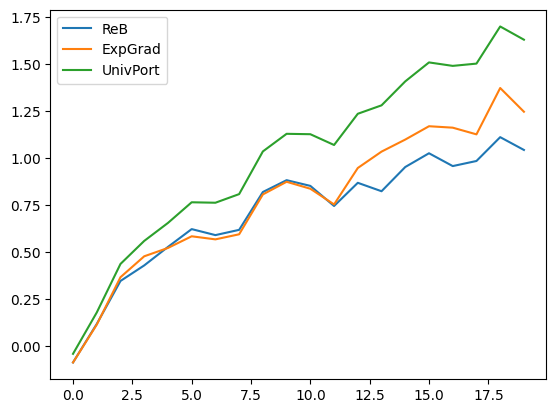

In [6]:
Q_RB = np.ones((m, n))/m

logW = lambda Q, X : np.cumsum(np.log(np.sum(Q * X, axis = 0)))

plt.plot(range(n), logW(Q_RB, X), label='ReB')
plt.plot(range(n), logW(Q_EG[:,0:n], X), label='ExpGrad')
plt.plot(range(n), logW(Q_UP, X), label='UnivPort')
plt.legend()
plt.savefig("Lecture-4-Portfolios.pdf")
